<a href="https://colab.research.google.com/github/irisroatis/phd_year1_code_term3/blob/main/neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# example making new class predictions for a classification problem
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
# generate 2d classification dataset
# X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
# scalar = MinMaxScaler()
# scalar.fit(X)
# X = scalar.transform(X)

In [ ]:
def generating_test_data_any_distributions(how_many_times_repeat, iterations, parameters):

    mu1 = parameters[0]
    sigma1 = parameters[1]
    mu2 = parameters[2]
    sigma2 = parameters[3]
    dim = len(mu1)

    testing_data=[]
    belonging_classes=[]

    for repeat in range(how_many_times_repeat):

        random_simulation = np.zeros((iterations,dim))
        which_class_list = np.zeros((iterations,))

        for itera in range(iterations):

            which_normal = random.randint(0,1)

            if which_normal == 0:

                if dim == 1:
                    random_simulation[itera,:] = np.random.normal(mu1, sigma1)
                else:
                    random_simulation[itera,:] = np.random.multivariate_normal(mu1, sigma1)


            else:

                if dim == 1:
                    random_simulation[itera,:] = np.random.normal(mu2, sigma2)
                else:
                     random_simulation[itera,:] = np.random.multivariate_normal(mu2, sigma2)


            which_class_list[itera,] = which_normal

        testing_data.append(random_simulation)
        belonging_classes.append(which_class_list)


    return testing_data, belonging_classes



def create_bins(data, data_test, how_many_bins, how_to_bin):
    mi = min(min(data), min(data_test))
    ma = max(max(data), max(data_test))
    if how_to_bin =='cons_std':
        bin_size = how_many_bins * np.std(data)
        start = (mi + ma)/2

        bins_right = [start]
        current_right = 1.0 * start

        while current_right  < ma:
            current_right += bin_size
            bins_right.append(current_right)

        bins_left = []
        current_left = 1.0 * start
        while current_left  > mi:
            current_left -= bin_size
            bins_left.append(current_left)

        bins = np.concatenate((bins_left[::-1],bins_right))
    elif how_to_bin =='fixed_number':
        bins = np.linspace(mi-0.00000001, ma+0.00000001,how_many_bins)
    else:
        assert('Way of binning unknown')
    return bins



def split_train_test(df, target_variable, indices_test = False):

    how_many_0s = len(df[df[target_variable] == 0])
    how_many_1s = len(df[df[target_variable] == 1])
    size = how_many_0s + how_many_1s

    randomlist = random.sample(list(df[df[target_variable]==0].index.values), 4 * how_many_0s // 5) + random.sample(list(df[df[target_variable]==1].index.values), 4 * how_many_1s // 5)
    not_in_randomlist = list(set(range(0,size)) - set(randomlist))

    df_test = df.iloc[not_in_randomlist,:]
    df_train = df.iloc[randomlist,:]
    df_train.sort_index(inplace=True)
    df_train.reset_index(inplace=True, drop = True)
    df_test.reset_index(inplace=True, drop = True)
    if indices_test:
        return df_train, df_test, not_in_randomlist
    else:
        return df_train, df_test



def dataset_to_Xandy(dataset, target_variable, only_X = True):
    X = dataset.loc[:, dataset.columns != target_variable]
    y = dataset.loc[:, dataset.columns == target_variable]

    if only_X:
        return X
    else:
        return X, y

In [ ]:
how_many_times_repeat = 1
iterations = 1000
mu1 = np.array([0, 0, 0])
mu2 = np.array([1, 1, 1])
sigma1 = np.identity(len(mu1))
sigma2 =  np.identity(len(mu1))
parameters = [mu1, sigma1, mu2, sigma2]
testing_data, belonging_classes = generating_test_data_any_distributions(how_many_times_repeat, iterations, parameters)
names_columns = ['Feature_'+str(i+1) for i in range(len(mu1))]

In [ ]:
target_variable = 'target'

df = pd.DataFrame(testing_data[0], columns = names_columns)
df[target_variable] = belonging_classes[0]
df.head()

,Feature_1,Feature_2,Feature_3,target
0,0.106097,0.068266,0.490502,0.0
1,0.744334,1.616188,2.357978,1.0
2,0.675756,2.537537,0.643385,1.0
3,0.678643,-0.100865,0.978832,1.0
4,-0.600036,0.230469,0.059741,1.0


In [ ]:
how_many_bins = 20

which_column_to_categories = 'Feature_1' ######## this needs to be changed
bins_col3 = create_bins(df[which_column_to_categories], df[which_column_to_categories], how_many_bins+1, 'fixed_number')
categories = list(np.arange(1, how_many_bins+1))
digitized = np.digitize(df[which_column_to_categories],bins_col3)
df[which_column_to_categories] = digitized
df[which_column_to_categories] = df[which_column_to_categories].replace(categories, categories)
df.head()

,Feature_1,Feature_2,Feature_3,target
0,8,0.068266,0.490502,0.0
1,10,1.616188,2.357978,1.0
2,10,2.537537,0.643385,1.0
3,10,-0.100865,0.978832,1.0
4,6,0.230469,0.059741,1.0


In [ ]:
df_train, df_test, ind_test = split_train_test(df, target_variable, indices_test=True)

print('Train size: '+str(df_train.shape) +'\nTest size: '+str(df_test.shape)+'\n\n')

Train size: (800, 4)
Test size: (200, 4)




<ipython-input-16-425ce113a8d3>:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.sort_index(inplace=True)


In [ ]:
X_train, y_train =  dataset_to_Xandy(df, target_variable, only_X = False) ###### the original dataset
X_test, y_test =  dataset_to_Xandy(df_test, target_variable, only_X = False) ###### the original dataset

In [ ]:
# define and fit the final model
model = Sequential()
model.add(Dense(4, input_shape=(3,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, y_train, epochs=500, verbose=0)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 16        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


7/7 [==============================] - 0s 1ms/step


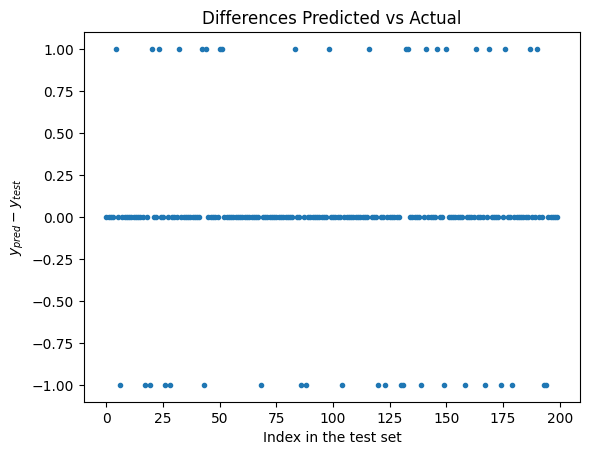

In [ ]:
# make a prediction
ynew =  (model.predict(X_test) > 0.5).astype("int32")

plt.plot(ynew-y_test,'.')
plt.title('Differences Predicted vs Actual')
plt.xlabel('Index in the test set')
plt.ylabel('$y_{pred} - y_{test}$')
plt.show()

In [ ]:
def dict_pos_neg(df, which_column_to_categories, target_variable):
  column_to_replace = df[which_column_to_categories]


dict_pos_neg(df, which_column_to_categories, target_variable)

0       8
1      10
2      10
3      10
4       6
       ..
995     7
996    11
997    14
998     5
999     5
Name: Feature_1, Length: 1000, dtype: int64